<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear**

### **Gold Price Prediction**

Nesta seção, apresentarei um tutorial de aprendizado de máquina sobre previsão do preço do ouro com Python. Iniciarei a tarefa de previsão do preço do ouro importando as bibliotecas Python necessárias e o conjunto de dados:

In [2]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv'

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
dados = pd.read_csv( url, parse_dates=True, index_col='Date')
print( dados.head() )

            USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
2001-01-02    272.80    271.10   183.026   181.617    288.677    287.334
2001-01-03    269.00    267.15   178.916   177.390    281.823    281.655
2001-01-04    268.75    267.10   178.869   178.352    282.538    282.049
2001-01-05    268.00    267.40   178.488   178.148    280.775    280.882
2001-01-08    268.60    268.30   178.769   178.664    282.410    282.481


### Agora vamos fazer alguma preparação de dados para ajustá-los adequadamente em nosso modelo de aprendizado de máquina:

In [26]:
# ( linha / linha anterior ) * 100 -> exemplo ( 267,10 / 267,15 ) * 100 = 99,981283922889762305820699981284
# ( 99,981283922889762305820699981284 - 100 ) = -0,018716077110237694179300018716
dados['RETURN'] = dados['USD (PM)'].pct_change() * 100

dados.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),RETURN
Date,,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334,NaN
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655,-1.457027
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,-0.018716
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,0.112317
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,0.336574


In [27]:
dados['LAGGED_RETURN'] = dados.RETURN.shift()
dados.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),RETURN,LAGGED_RETURN
Date,,,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334,NaN,NaN
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655,-1.457027,NaN
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,0.336574,0.112317


In [28]:
dados = dados.dropna()
dados.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),RETURN,LAGGED_RETURN
Date,,,,,,,,
2001-01-04,268.75,267.1,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.4,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.3,178.769,178.664,282.410,282.481,0.336574,0.112317
2001-01-09,267.75,267.0,179.855,179.195,284.507,283.590,-0.484532,0.336574
2001-01-10,266.70,266.3,178.777,178.665,283.573,283.298,-0.262172,-0.484532


In [29]:
treinamento = dados['2001': '2018']
teste = dados['2019']

In [30]:
treinamento

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),RETURN,LAGGED_RETURN
Date,,,,,,,,
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,0.336574,0.112317
2001-01-09,267.75,267.00,179.855,179.195,284.507,283.590,-0.484532,0.336574
2001-01-10,266.70,266.30,178.777,178.665,283.573,283.298,-0.262172,-0.484532
...,...,...,...,...,...,...,...,...
2018-12-19,1248.60,1255.00,986.770,990.700,1094.650,1098.130,0.698066,0.374502
2018-12-20,1255.00,1259.75,988.690,995.450,1093.730,1100.770,0.378486,0.698066
2018-12-21,1257.60,1258.15,993.760,994.820,1101.530,1103.400,-0.127009,0.378486


In [31]:
teste

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),RETURN,LAGGED_RETURN
Date,,,,,,,,
2019-01-02,1287.20,1282.90,1014.44,1017.34,1125.27,1129.21,0.304926,0.000000
2019-01-03,1287.95,1290.45,1024.05,1024.49,1132.62,1132.24,0.588510,0.304926
2019-01-04,1290.35,1279.90,1016.80,1013.42,1131.51,1127.34,-0.817544,0.588510
2019-01-07,1291.50,1292.20,1013.83,1011.28,1129.03,1126.93,0.961013,-0.817544
2019-01-08,1283.90,1286.45,1006.71,1010.38,1121.62,1124.36,-0.444978,0.961013
...,...,...,...,...,...,...,...,...
2019-08-27,1531.85,1532.95,1250.91,1247.51,1378.97,1380.88,1.938423,0.116507
2019-08-28,1541.75,1537.15,1263.31,1258.77,1389.89,1387.43,0.273982,1.938423
2019-08-29,1536.65,1540.20,1260.51,1262.96,1387.29,1392.03,0.198419,0.273982


In [32]:
# Crie conjuntos de treinamento e teste para variáveis dependentes e independentes
Xtrain = treinamento['LAGGED_RETURN'].to_frame()
ytrain = treinamento['RETURN']

Xtest  = teste['LAGGED_RETURN'].to_frame()
ytest  = teste['RETURN'].to_frame()

### **Usando modelo de regressão linear**

Agora que preparamos os dados para caber em um modelo de aprendizado de máquina para a tarefa de previsão do preço do ouro, a próxima etapa é escolher um algoritmo de aprendizado de máquina. Para esta tarefa, usarei o algoritmo de Regressão Linear:

In [33]:
modelo = LinearRegression()
modelo.fit(Xtrain, ytrain)

ypred = modelo.predict(Xtest)

Agora vamos representar graficamente os resultados da previsão do preço do ouro que obtivemos do algoritmo de regressão linear:

In [35]:
import matplotlib.pyplot as plt

# Criando um DataFrame
out_of_sample_results = ytest
out_of_sample_results

,RETURN
Date,
2019-01-02,0.304926
2019-01-03,0.588510
2019-01-04,-0.817544
2019-01-07,0.961013
2019-01-08,-0.444978
...,...
2019-08-27,1.938423
2019-08-28,0.273982
2019-08-29,0.198419


In [36]:
out_of_sample_results['PREVISAO'] = modelo.predict(Xtest)

In [37]:
out_of_sample_results

,RETURN,PREVISAO
Date,,
2019-01-02,0.304926,0.040971
2019-01-03,0.588510,0.040540
2019-01-04,-0.817544,0.040140
2019-01-07,0.961013,0.042124
2019-01-08,-0.444978,0.039615
...,...,...
2019-08-27,1.938423,0.040806
2019-08-28,0.273982,0.038236
2019-08-29,0.198419,0.040584


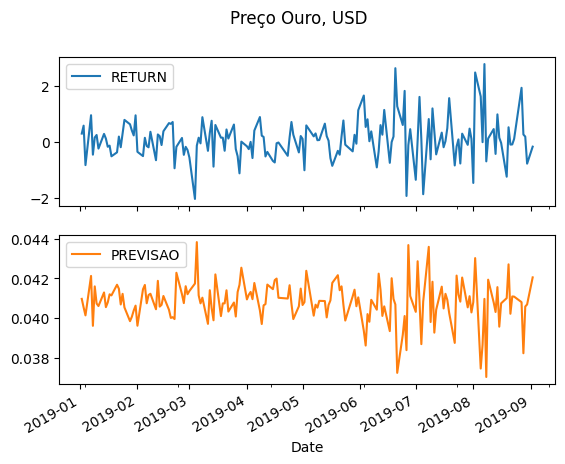

In [38]:
out_of_sample_results.plot( subplots=True, title='Preço Ouro, USD')
plt.show()